In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.models import PSPL_model
from pyLIMA.models import FSPL_model
from pyLIMA.models import FSPLarge_model
from pyLIMA.models import PSBL_model

from pyLIMA.models import FSBL_model
# from pyLIMA.models import DSPL_model
#in v2 we need to separately call plots.
from pyLIMA.outputs import pyLIMA_plots
# import ipywidgets as widgets
# from ipywidgets import interactive,interact, HBox, Layout,VBox
from IPython.display import display

In [10]:
# from pyLIMA.orbitalmotion import orbital_motion_2D
# time=0.1
# t0_om = 0
# dalpha_dt=1
# orbital_motion_2D.orbital_motion_2D_trajectory_shift(time, t0_om, dalpha_dt)

0.0002737850787132101

OrderedDict([('t0', 2457777.777), ('u0', 0.3333333333333333), ('tE', 50), ('rho', 0.001), ('separation', 0.1), ('mass_ratio', 0.000125), ('alpha', 2), ('fsource_Simulation', None), ('fblend_Simulation', None), ('v_para', 500), ('v_perp', 300), ('v_radial', 300)])


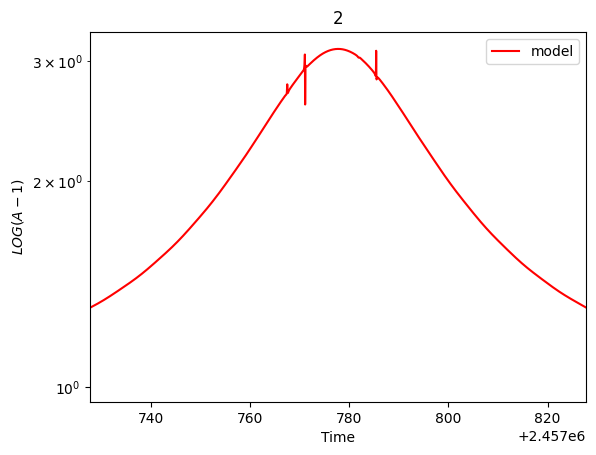

In [38]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.models import USBL_model
from collections import OrderedDict

simulated_event = event.Event(ra = 170, dec=-70)
simulated_event.name = 'Simulated'   
t0guess = 2457777.777

time_sim = np.linspace(t0guess-200,t0guess+200,50000)      
lightcurve_sim = np.c_[time_sim,[19.] * len(time_sim),[0.01] * len(time_sim)]

telescope = telescopes.Telescope(name='Simulation',
                                 camera_filter='I',
                                 lightcurve = lightcurve_sim.astype(float),
                                 lightcurve_names = ['time','mag','err_mag'],
                                 lightcurve_units = ['JD','mag','err_mag'],
                                     )

simulated_event.telescopes.append(telescope)
t0=t0guess

u0=2/6
tE=50
rho=0.001
s=1/10
q=1.25e-4

angles = np.linspace(0,2*np.pi,100)

alpha=2
usbl = USBL_model.USBLmodel(simulated_event, parallax=['None',0], orbital_motion=['2D', t0])

# Initialize the OrderedDict
pyLIMA_parameters = OrderedDict([
    ('t0', 2457777.777),
    ('u0', 0.3333333333333333),
    ('tE', 50),
    ('rho', 0.001),
    ('separation', 0.1),
    ('mass_ratio', 0.000125),
    ('alpha', 2),
    ('fsource_Simulation', None),
    ('fblend_Simulation', None)
])

# Add new parameters
pyLIMA_parameters['v_para'] = 500
pyLIMA_parameters['v_perp'] = 300
pyLIMA_parameters['v_radial'] = 300

print(pyLIMA_parameters)

magnification = usbl.model_magnification(telescope, pyLIMA_parameters)
magnification
plt.xlabel("Time")
plt.ylabel("$LOG(A-1)$")
plt.title(alpha)
# plt.plot(time_sim,np.log10(magnification-1),"r",label="model")
plt.plot(time_sim,magnification,"r",label="model")
plt.yscale('log')
plt.xlim(t0-tE,t0+tE)
# plt.gca().invert_yaxis()
plt.legend()
plt.show()       
plt.close()